<h5> Dataset Description </h5>
The Data description is as follows:

1. diagnosis: The diagnosis of breast tissues (1 = malignant, 0 = benign) where malignant denotes that the disease is harmful
2. mean_radius: mean of distances from center to points on the perimeter
3. mean_texture: standard deviation of gray-scale values
4. mean_perimeter: mean size of the core tumor
5. mean_area: mean area of the core tumor
6. mean_smoothness: mean of local variation in radius lengths


All feature values are recoded with four significant digits.



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split


### Carregando o dataset

In [2]:
#data = pd.read_csv('Breast_cancer_data.csv')
data = pd.read_csv('data.csv')
data = data.drop('id', axis=1)
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Checando se existem valores nulos

In [3]:
## check null entries
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Removendo ítens duplicados

In [4]:
## remove duplicate entries
data.drop_duplicates(inplace = True)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Porque temos Raio, Perímetro e Área como features independetes? Não são features correlacionadas? Vamos investigar!

## Perímetro X Raio

Correlação entre o perímetro médio e o raio médio: 0.9978552814938106


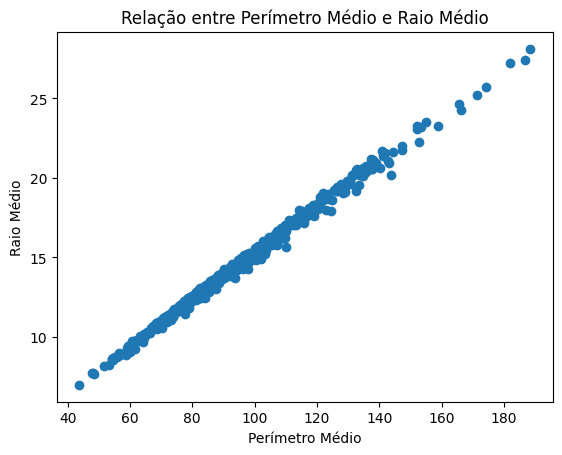

In [5]:
print(f"Correlação entre o perímetro médio e o raio médio: {data['perimeter_mean'].corr(data['radius_mean'])}")

plt.scatter(data.perimeter_mean, data.radius_mean)
plt.xlabel("Perímetro Médio")
plt.ylabel("Raio Médio")
plt.title("Relação entre Perímetro Médio e Raio Médio")
plt.show()

## Área x Raio

Correlação entre o área média e o raio médio: 0.9873571700566127


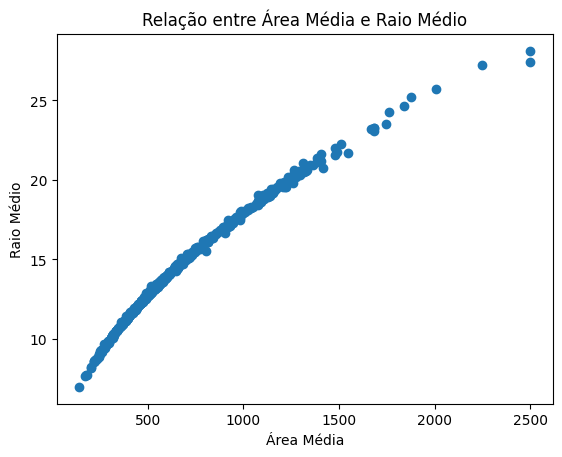

In [6]:
print(f"Correlação entre o área média e o raio médio: {data['area_mean'].corr(data['radius_mean'])}")

plt.scatter(data.area_mean, data.radius_mean)
plt.xlabel("Área Média")
plt.ylabel("Raio Médio")
plt.title("Relação entre Área Média e Raio Médio")
plt.show()

## Perímetro x Área

Correlação entre o perímetro médio e o área média: 0.9865068039913906


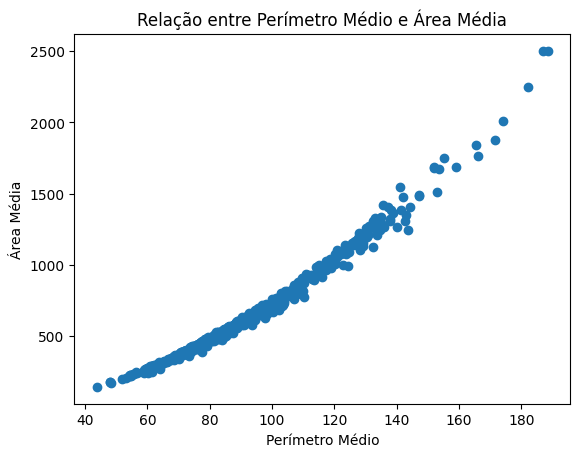

In [7]:
print(f"Correlação entre o perímetro médio e o área média: {data['perimeter_mean'].corr(data['area_mean'])}")



plt.scatter(data.perimeter_mean, data.area_mean)
plt.xlabel("Perímetro Médio")
plt.ylabel("Área Média")
plt.title("Relação entre Perímetro Médio e Área Média")
plt.show()

## Vamos então descartar a coluna "Perímetro" e a coluna "Área"
- Estas duas colunas não complementam a variabilidade dos dados e só dificultarão o treinamento do modelo
- Retirando essas colunas nós também retiramos a necessidade de obtê-las para uma inferência futura

In [8]:
data.drop(['perimeter_mean'], axis=1, inplace=True)
data.drop(['area_mean'], axis=1, inplace=True)
data

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

## Tudo certo! Agora vamos separar os dados de treinamento e de validação

In [10]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,1:].values
y = data.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

print(f"O conjunto de treinamento contém {len(X_train)} ítens e o conjunto de teste contém {len(X_test)} itens.")

O conjunto de treinamento contém 455 ítens e o conjunto de teste contém 114 itens.


#### Tudo certo mesmo? Vamos dar uma olhada nos valores médios de cada coluna para tentar entender 

In [11]:
data.mean()

diagnosis                    0.372583
radius_mean                 14.127292
texture_mean                19.289649
smoothness_mean              0.096360
compactness_mean             0.104341
concavity_mean               0.088799
concave points_mean          0.048919
symmetry_mean                0.181162
fractal_dimension_mean       0.062798
radius_se                    0.405172
texture_se                   1.216853
perimeter_se                 2.866059
area_se                     40.337079
smoothness_se                0.007041
compactness_se               0.025478
concavity_se                 0.031894
concave points_se            0.011796
symmetry_se                  0.020542
fractal_dimension_se         0.003795
radius_worst                16.269190
texture_worst               25.677223
perimeter_worst            107.261213
area_worst                 880.583128
smoothness_worst             0.132369
compactness_worst            0.254265
concavity_worst              0.272188
concave poin

### Vamos realizar uma trasnformação nos dados para que fiquem com a média próxima de zero e amplitudes mais próximas

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
pd.DataFrame(X_train, columns = data.columns[1:]).mean()

radius_mean               -8.976946e-16
texture_mean              -3.351654e-15
smoothness_mean           -1.465128e-15
compactness_mean           5.317404e-16
concavity_mean             6.614977e-16
concave points_mean        4.760539e-16
symmetry_mean             -5.686782e-15
fractal_dimension_mean     6.948044e-16
radius_se                  4.904502e-17
texture_se                 5.768280e-16
perimeter_se               8.107068e-16
area_se                    1.828818e-16
smoothness_se              1.791607e-15
compactness_se             4.155406e-16
concavity_se               3.255028e-16
concave points_se          6.022655e-16
symmetry_se               -1.517711e-16
fractal_dimension_se       1.345810e-15
radius_worst              -4.289609e-16
texture_worst              4.924022e-16
perimeter_worst           -1.517955e-15
area_worst                 1.324947e-16
smoothness_worst           5.923375e-15
compactness_worst         -4.703693e-16
concavity_worst           -1.369234e-15


## Agora sim, tudo pronto!

### Vamos instanciar as métricas para podermos avaliar os modelos posteriormente. Relembrando:

- <span style="color: green">Acertos</span>
    - "True Positive" (TP): Previsão --> <span style="color: orange">Maligno</span> ;  Real --> <span style="color: orange">Maligno</span>
    - "True Negative" (TN): Previsão --> <span style="color: cyan">Benigno</span> ;  Real --> <span style="color: cyan">Benigno</span>
<br><br>
- <span style="color: red">Erros</span>
    - "False Positive" (FP): Previsão --> <span style="color: orange">Maligno</span> ;  Real --> <span style="color: cyan">Benigno</span>
    - "False Negative" (FN): Previsão --> <span style="color: cyan">Benigno</span> ;  Real --> <span style="color: orange">Maligno</span>

### Métricas:

- Acurácia = $\frac{T_P + T_N} {T_P + T_N + F_P + F_N}$
<br><br>
- Recall = $\frac{T_P}{T_P+F_N}$
<br><br>
- Precisão = $\frac{T_P}{T_P+F_P}$
<br><br>
- F1 - Score = $\frac{{2P_{rec}R_{ec}}}{{P_{rec}+R_{ec}}}$


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

acc = {}
rec = {}
prec = {}
f1 = {}

## Regressão linear
<img src="./images/linear_regression.png" width="300">

Acurácia: 95.6140350877193 %
Recall: 89.36170212765957 %
Precisão: 100.0 %
F1: 94.3820224719101 %


Matriz de confusão:


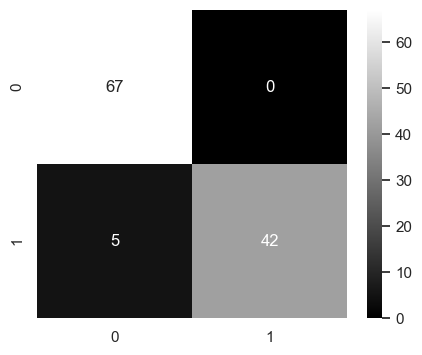

In [15]:
# Importando o módulo de regressão linear 
from sklearn.linear_model import LinearRegression

# Treinando o modelo 
regr = LinearRegression()
regr.fit(X_train, y_train)


# Prevendo os resultados
y_pred = regr.predict(X_test)
y_pred = [1 if x >= 0.5 else 0 for x in y_pred]


# Analisando a qualidade do modelo
cm = confusion_matrix(y_test, y_pred)

acc['reg_linear'] = accuracy_score(y_test, y_pred)
rec['reg_linear'] = recall_score(y_test, y_pred)
prec['reg_linear'] = precision_score(y_test, y_pred)
f1['reg_linear'] = f1_score(y_test, y_pred)
print(f"Acurácia: {100*acc['reg_linear']} %")
print(f"Recall: {100*rec['reg_linear']} %")
print(f"Precisão: {100*prec['reg_linear']} %")
print(f"F1: {100*f1['reg_linear']} %")

print(f"\n\nMatriz de confusão:")
plt.figure(figsize=(5,4))
sns.set(font_scale = 1)
sns.set_style("white")
_ = sns.heatmap(cm, cmap = 'gist_yarg_r',annot = True, fmt='d')

# Regressão logística
<img src="./images/logistic.png" width="300">

Acurácia: 96.49122807017544 %
Recall: 95.74468085106383 %
Precisão: 95.74468085106383 %
F1: 95.74468085106385 %


Matriz de confusão:


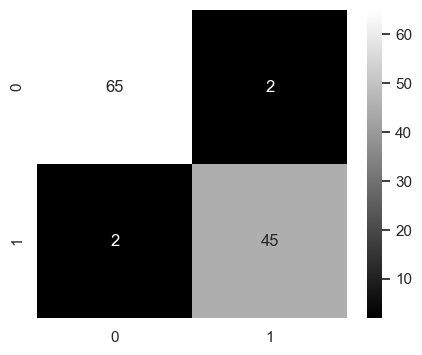

In [16]:
# Treinando modelo
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


# Prevendo os resultados
y_pred = classifier.predict(X_test)



# Analisando a qualidade do modelo
cm = confusion_matrix(y_test, y_pred)

acc['logistic'] = accuracy_score(y_test, y_pred)
rec['logistic'] = recall_score(y_test, y_pred)
prec['logistic'] = precision_score(y_test, y_pred)
f1['logistic'] = f1_score(y_test, y_pred)
print(f"Acurácia: {100*acc['logistic']} %")
print(f"Recall: {100*rec['logistic']} %")
print(f"Precisão: {100*prec['logistic']} %")
print(f"F1: {100*f1['logistic']} %")


print(f"\n\nMatriz de confusão:")
plt.figure(figsize=(5,4))
sns.set(font_scale = 1)
sns.set_style("white")
_ = sns.heatmap(cm, cmap = 'gist_yarg_r',annot = True, fmt='d')

# K Neighbors (vizinho mais próximo)
<img src="./images/k_nei.png" width="300">


Acurácia: 95.6140350877193 %
Recall: 89.36170212765957 %
Precisão: 100.0 %
F1: 94.3820224719101 %


Matriz de confusão:


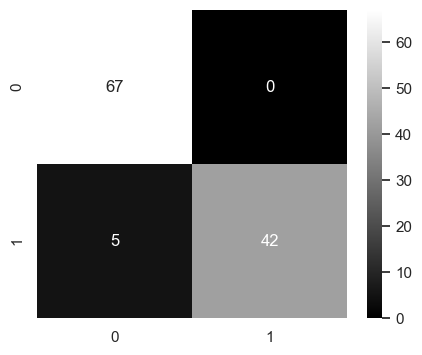

In [17]:
# Treinando modelo
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

# Prevendo os resultados
y_pred = knn.predict(X_test)

# Analisando a qualidade do modelo
cm = confusion_matrix(y_test, y_pred)

acc['k_neighbors'] = accuracy_score(y_test, y_pred)
rec['k_neighbors'] = recall_score(y_test, y_pred)
prec['k_neighbors'] = precision_score(y_test, y_pred)
f1['k_neighbors'] = f1_score(y_test, y_pred)
print(f"Acurácia: {100* acc['k_neighbors']} %")
print(f"Recall: {100* rec['k_neighbors']} %")
print(f"Precisão: {100* prec['k_neighbors']} %")
print(f"F1: {100* f1['k_neighbors']} %")


print(f"\n\nMatriz de confusão:")
plt.figure(figsize=(5,4))
sns.set(font_scale = 1)
sns.set_style("white")
_ = sns.heatmap(cm, cmap = 'gist_yarg_r',annot = True, fmt='d')

# Linear SVM 
<img src="./images/SVM_linear.png" width="200">


Acurácia: 98.24561403508771 %
Recall: 97.87234042553192 %
Precisão: 97.87234042553192 %
F1: 97.87234042553192 %


Matriz de confusão:


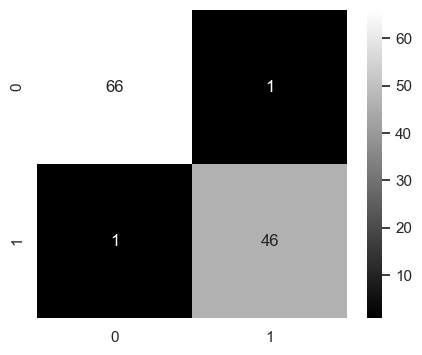

In [18]:
# Treinando modelo
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)

# Prevendo os resultados
y_pred = svm.predict(X_test)


# Analisando a qualidade do modelo
cm = confusion_matrix(y_test, y_pred)

acc['SVM_linear'] = accuracy_score(y_test, y_pred)
rec['SVM_linear'] = recall_score(y_test, y_pred)
prec['SVM_linear'] = precision_score(y_test, y_pred)
f1['SVM_linear'] = f1_score(y_test, y_pred)
print(f"Acurácia: {100*acc['SVM_linear']} %")
print(f"Recall: {100*rec['SVM_linear']} %")
print(f"Precisão: {100*prec['SVM_linear']} %")
print(f"F1: {100*f1['SVM_linear']} %")


print(f"\n\nMatriz de confusão:")
plt.figure(figsize=(5,4))
sns.set(font_scale = 1)
sns.set_style("white")
_ = sns.heatmap(cm, cmap = 'gist_yarg_r',annot = True, fmt='d')

# Kernal SVM
<img src="./images/SVM_kernal.png" width="200">


Acurácia: 98.24561403508771 %
Recall: 95.74468085106383 %
Precisão: 100.0 %
F1: 97.82608695652173 %


Matriz de confusão:


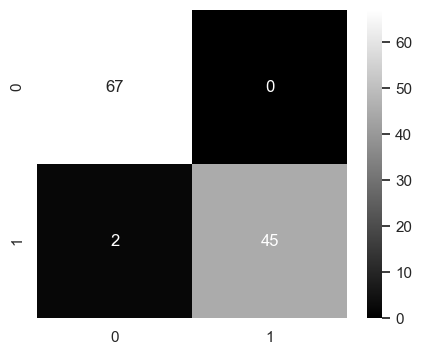

In [19]:
# Treinando modelo
from sklearn.svm import SVC
kernel_svm = SVC(kernel = 'rbf')
kernel_svm.fit(X_train, y_train)

# Prevendo os resultados
y_pred = kernel_svm.predict(X_test)


# Analisando a qualidade do modelo
cm = confusion_matrix(y_test, y_pred)

acc['SVM_kernal'] = accuracy_score(y_test, y_pred)
rec['SVM_kernal'] = recall_score(y_test, y_pred)
prec['SVM_kernal'] = precision_score(y_test, y_pred)
f1['SVM_kernal'] = f1_score(y_test, y_pred)
print(f"Acurácia: {100*acc['SVM_kernal']} %")
print(f"Recall: {100*rec['SVM_kernal']} %")
print(f"Precisão: {100*prec['SVM_kernal']} %")
print(f"F1: {100*f1['SVM_kernal']} %")


print(f"\n\nMatriz de confusão:")
plt.figure(figsize=(5,4))
sns.set(font_scale = 1)
sns.set_style("white")
_ = sns.heatmap(cm, cmap = 'gist_yarg_r',annot = True, fmt='d')

# Naive Bayes (Redes Bayesianas)
<img src="./images/naive.png" width="200">


Acurácia: 89.47368421052632 %
Recall: 87.2340425531915 %
Precisão: 87.2340425531915 %
F1: 87.2340425531915 %


Matriz de confusão:


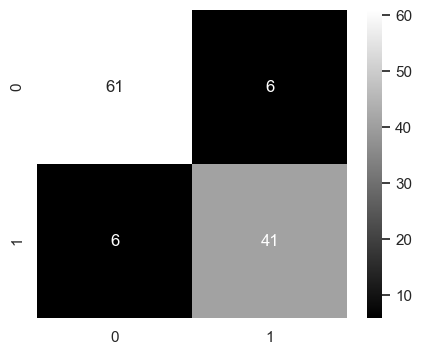

In [20]:
# Treinando modelo
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Prevendo os resultados
y_pred = gnb.predict(X_test)


# Analisando a qualidade do modelo
cm = confusion_matrix(y_test, y_pred)

acc['naive_bayes'] = accuracy_score(y_test, y_pred)
rec['naive_bayes'] = recall_score(y_test, y_pred)
prec['naive_bayes'] = precision_score(y_test, y_pred)
f1['naive_bayes'] = f1_score(y_test, y_pred)
print(f"Acurácia: {100*acc['naive_bayes']} %")
print(f"Recall: {100*rec['naive_bayes']} %")
print(f"Precisão: {100*prec['naive_bayes']} %")
print(f"F1: {100*f1['naive_bayes']} %")


print(f"\n\nMatriz de confusão:")
plt.figure(figsize=(5,4))
sns.set(font_scale = 1)
sns.set_style("white")
_ = sns.heatmap(cm, cmap = 'gist_yarg_r',annot = True, fmt='d')

# Decision Tree Classifier (árvore de decisão)
<img src="./images/tree.png" width="200">


Acurácia: 91.22807017543859 %
Recall: 93.61702127659575 %
Precisão: 86.27450980392157 %
F1: 89.79591836734694 %


Matriz de confusão:


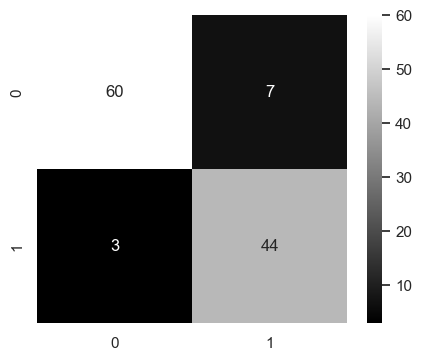

In [21]:
# Treinando modelo
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Prevendo os resultados
y_pred = dtc.predict(X_test)

# Analisando a qualidade do modelo
cm = confusion_matrix(y_test, y_pred)

acc['tree'] = accuracy_score(y_test, y_pred)
rec['tree'] = recall_score(y_test, y_pred)
prec['tree'] = precision_score(y_test, y_pred)
f1['tree'] = f1_score(y_test, y_pred)
print(f"Acurácia: {100*acc['tree']} %")
print(f"Recall: {100*rec['tree']} %")
print(f"Precisão: {100*prec['tree']} %")
print(f"F1: {100*f1['tree']} %")


print(f"\n\nMatriz de confusão:")
plt.figure(figsize=(5,4))
sns.set(font_scale = 1)
sns.set_style("white")
_ = sns.heatmap(cm, cmap = 'gist_yarg_r',annot = True, fmt='d')

#  Random Forest
<img src="./images/random_forest.png" width="300">


Acurácia: 94.73684210526315 %
Recall: 93.61702127659575 %
Precisão: 93.61702127659575 %
F1: 93.61702127659575 %


Matriz de confusão:


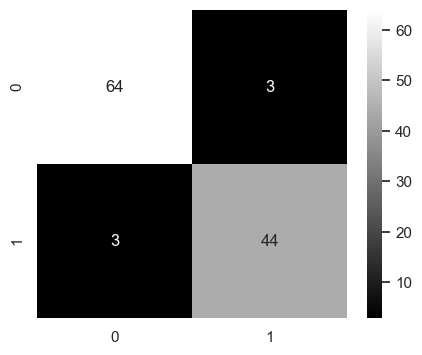

In [22]:
# Treinando modelo
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
rfc.fit(X_train, y_train)

# Prevendo os resultados
y_pred = rfc.predict(X_test)

# Analisando a qualidade do modelo
cm = confusion_matrix(y_test, y_pred)



acc['random_forest'] = accuracy_score(y_test, y_pred)
rec['random_forest'] = recall_score(y_test, y_pred)
prec['random_forest'] = precision_score(y_test, y_pred)
f1['random_forest'] = f1_score(y_test, y_pred)
print(f"Acurácia: {100*acc['random_forest']} %")
print(f"Recall: {100*rec['random_forest']} %")
print(f"Precisão: {100*prec['random_forest']} %")
print(f"F1: {100*f1['random_forest']} %")


print(f"\n\nMatriz de confusão:")
plt.figure(figsize=(5,4))
sns.set(font_scale = 1)
sns.set_style("white")
_ = sns.heatmap(cm, cmap = 'gist_yarg_r',annot = True, fmt='d')

# Artificial Neural Network (ANN)
<img src="./images/NN.png" width="300">


In [23]:
# Importando módulos
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential


# Criando modelo
model = Sequential()
model.add(Dense(units = 3, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 3, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando modelo
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
# Treinando o modelo
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
deep_history = model.fit(X_train, y_train, epochs=100, batch_size = 32, validation_data = (X_test, y_test), callbacks=[early_stop]                            )

model_path = 'modelo.h5'
model.save(model_path)

model_weights_path= 'modelo_weights.h5'
model.save_weights(model_weights_path) 

Epoch 1/100
15/15 [==============================] - 1s 11ms/step - loss: 0.7002 - accuracy: 0.5077 - val_loss: 0.6850 - val_accuracy: 0.5351
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 0.7005 - accuracy: 0.5275 - val_loss: 0.6731 - val_accuracy: 0.7456
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.6527 - val_loss: 0.6639 - val_accuracy: 0.7982
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.6857 - val_loss: 0.6557 - val_accuracy: 0.8070
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6560 - accuracy: 0.7407 - val_loss: 0.6454 - val_accuracy: 0.8246
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6582 - accuracy: 0.7209 - val_loss: 0.6323 - val_accuracy: 0.8509
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6458 - accuracy: 0.7604 - val_loss: 0.6195 - val_accuracy: 0.8596
Epoch 8/100


In [25]:
## Load model
#model.load_weights(top_model_weights_path) 

<Figure size 800x600 with 0 Axes>

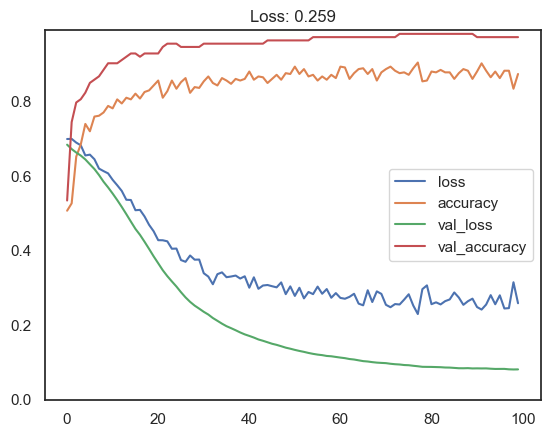

In [26]:
def plot_loss(history):
    historydata = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydata.plot(ylim=(0, 1.01*historydata.values.max()))
    plt.title('Loss: %.3f' % history.history['loss'][-1])
plot_loss(deep_history)

4/4 [==============================] - 0s 1ms/step
Acurácia: 97.36842105263158 %
Recall: 95.74468085106383 %
Precisão: 97.82608695652173 %
F1: 96.7741935483871 %


Matriz de confusão:


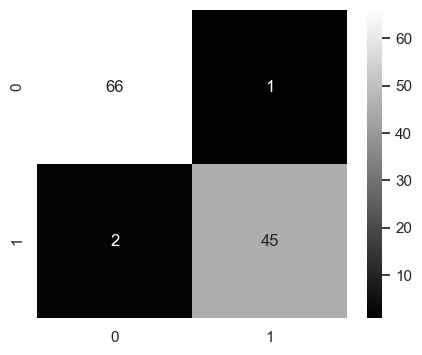

In [27]:
# Prevendo os resultados
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)


# Analisando a qualidade do modelo
cm = confusion_matrix(y_test, y_pred)

acc['ANN'] = accuracy_score(y_test, y_pred)
rec['ANN'] = recall_score(y_test, y_pred)
prec['ANN'] = precision_score(y_test, y_pred)
f1['ANN'] = f1_score(y_test, y_pred)
print(f"Acurácia: {100*acc['ANN']} %")
print(f"Recall: {100*rec['ANN']} %")
print(f"Precisão: {100*prec['ANN']} %")
print(f"F1: {100*f1['ANN']} %")


print(f"\n\nMatriz de confusão:")
plt.figure(figsize=(5,4))
sns.set(font_scale = 1)
sns.set_style("white")
_ = sns.heatmap(cm, cmap = 'gist_yarg_r',annot = True, fmt='d')

# Métricas

##### Relembrando:
- <span style="color: green">Acertos</span>
    - "True Positive" (TP): Previsão --> <span style="color: orange">Maligno</span> ;  Real --> <span style="color: orange">Maligno</span>
    - "True Negative" (TN): Previsão --> <span style="color: cyan">Benigno</span> ;  Real --> <span style="color: cyan">Benigno</span>
<br><br>
- <span style="color: red">Erros</span>
    - "False Positive" (FP): Previsão --> <span style="color: orange">Maligno</span> ;  Real --> <span style="color: cyan">Benigno</span>
    - "False Negative" (FN): Previsão --> <span style="color: cyan">Benigno</span> ;  Real --> <span style="color: orange">Maligno</span>


- Acurácia = $\frac{T_P + T_N} {T_P + T_N + F_P + F_N}$
<br><br>
- Recall = $\frac{T_P}{T_P+F_N}$
<br><br>
- Precisão = $\frac{T_P}{T_P+F_P}$
<br><br>
- F1 - Score = $\frac{{2P_{rec}R_{ec}}}{{P_{rec}+R_{ec}}}$


In [28]:
metrics = pd.DataFrame({
    'Modelo': acc.keys(),
    'Acurácia':  np.array(list(acc.values()))*100,
    'Recall': np.array(list(rec.values()))*100,
    'Precisão': np.array(list(prec.values()))*100,
    'F1': np.array(list(f1.values()))*100
}).sort_values(by = ['Recall'], ascending = False)
metrics.reset_index(drop = True, inplace = True)
metrics

,Modelo,Acurácia,Recall,Precisão,F1
0,SVM_linear,98.245614,97.872340,97.872340,97.872340
1,logistic,96.491228,95.744681,95.744681,95.744681
2,SVM_kernal,98.245614,95.744681,100.000000,97.826087
3,ANN,97.368421,95.744681,97.826087,96.774194
4,tree,91.228070,93.617021,86.274510,89.795918
5,random_forest,94.736842,93.617021,93.617021,93.617021
6,reg_linear,95.614035,89.361702,100.000000,94.382022
7,k_neighbors,95.614035,89.361702,100.000000,94.382022
8,naive_bayes,89.473684,87.234043,87.234043,87.234043
